In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings

In [2]:
# obtaining data
df = pd.read_excel("D:/LLoyds/Data.xlsx", index_col=[0])
df

,FacilityName,BagQty,ItemQty,PackQty,PatientQty
Date,,,,,
January,Branch A49,507,1665,2545,429
January,Branch A124,434,1545,1821,377
January,Branch A188,721,2304,2684,631
January,Branch A126,956,3890,4875,784
January,Branch A180,1519,4448,5901,1346
...,...,...,...,...,...
December,Branch A74,401,1548,1905,363
December,Branch A12,1197,4486,6210,980
December,Branch A86,1508,4143,5923,1070


# K-Means Clustering

In [3]:
!pip install kneed

In [4]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [5]:
features = df[['BagQty', 'ItemQty', 'PackQty', 'PatientQty']].values
true_labels = df['FacilityName'].values

In [6]:
dict_true_labels = dict(enumerate(true_labels))
index_true_labels = list(dict_true_labels.keys())
index_true_labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [7]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import numpy as np


In [8]:
cols = ['BagQty', 'ItemQty', 'PackQty', 'PatientQty']

This part of the project's purpose is to develop a targeted set of branches with similar values. To focus the branches, we must divide the total number of branches into smaller subsets based on the attributes in our dataset. The columns in the dataset are the features, and each row represents a unique business activity in each month. As a result, we want to find those groups.

Despite having marked branches, our goal is to identify branches that had values that were comparable each month. Techniques for supervised machine learning are possible. The K-means clustering technique is one example of an unsupervised algorithm that we use instead. 


In [9]:
features

array([[ 507, 1665, 2545,  429],
       [ 434, 1545, 1821,  377],
       [ 721, 2304, 2684,  631],
       ...,
       [1508, 4143, 5923, 1070],
       [ 903, 2521, 3073,  795],
       [1384, 4705, 5554, 1140]], dtype=int64)

In [10]:
true_labels

array(['Branch A49', 'Branch A124', 'Branch A188', ..., 'Branch A86',
       'Branch A2', 'Branch A70'], dtype=object)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

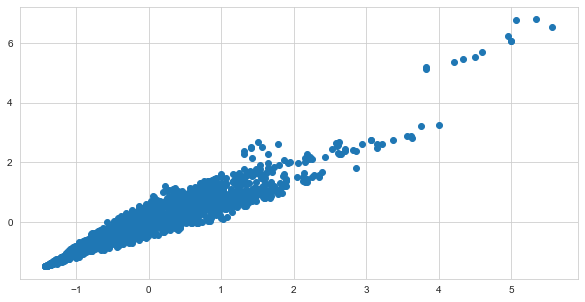

In [13]:
# plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.figure(figsize=(10,5))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1]);


In [14]:
# set 5 branches to cluster
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)

plot the groups together with the calculated centroids:



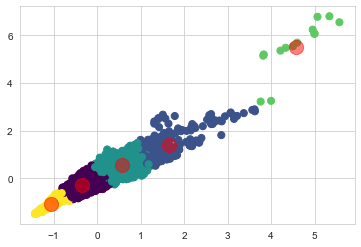

In [15]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

Let’s try this again but set K=3

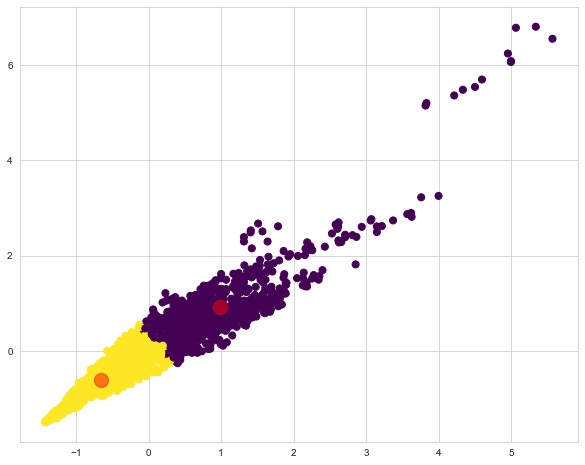

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)
plt.figure(figsize=(10,8))

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

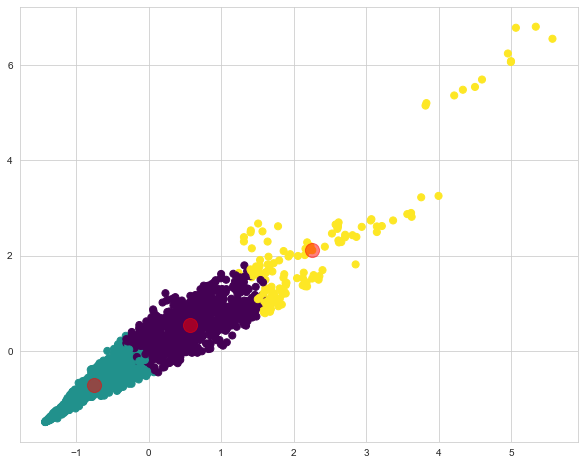

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)
plt.figure(figsize=(10,8))

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

The group colored green plot includes about 50% of the data points. When we choose a value for K which is too low we might be failing to capture all of the possible groups, in other words we are failing to get the focus required for the data.

let’s see what happens when we try to divide the data into 12 groups.

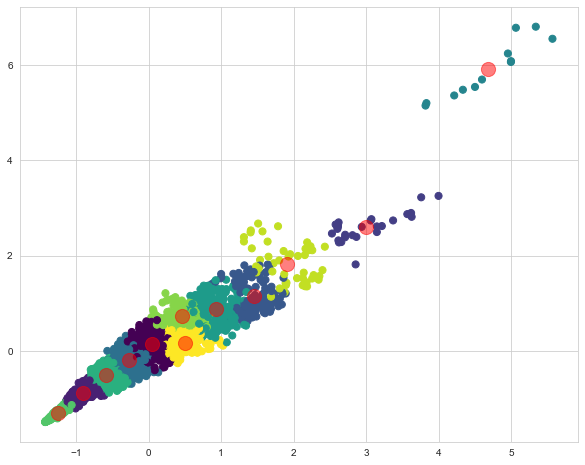

In [18]:
kmeans = KMeans(n_clusters=12) 
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)
plt.figure(figsize=(10,8))

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

When we choose a value for K which is too high we might have overlapping groups and some groups which are almost empty. 

This example illustrates visually why it is important to get a good balanced value for K. 

In [19]:
!pip install yellowbrick

### Identifying a good value for K

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

using the elbow method.

ref: https://medium.com/the-data-science-publication/how-to-find-groups-within-data-using-the-k-means-algorithm-3c1d6feeacf9

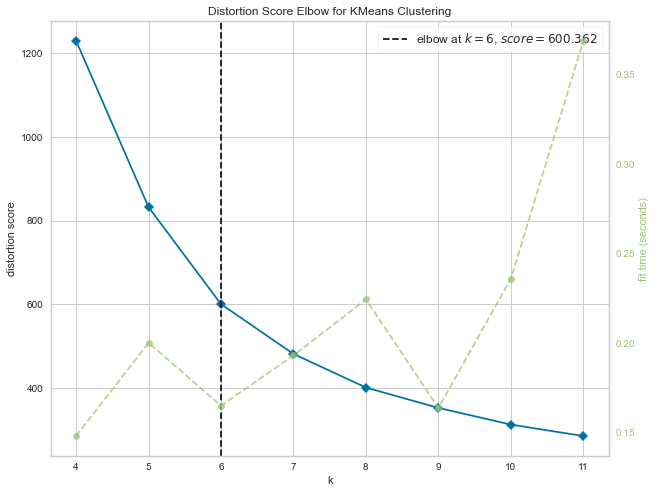

In [21]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
plt.figure(figsize=(10,8))

visualizer.fit(scaled_features)    
visualizer.poof();

In this case the elbow method is giving us a value of K=6. 

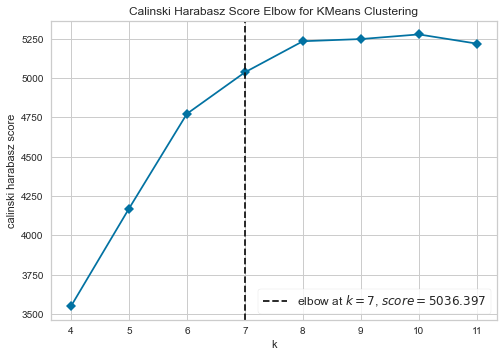

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='calinski_harabasz', timings=False)

visualizer.fit(scaled_features)    
visualizer.poof();

This suggests a value of K=7. We can also try the silhouette method:

using the silhouette method

In [23]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score(scaled_features, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.564829404796416)
For n_clusters = 3, silhouette score is 0.5268674998854475)
For n_clusters = 4, silhouette score is 0.4842297916866017)
For n_clusters = 5, silhouette score is 0.47736363867591286)
For n_clusters = 6, silhouette score is 0.46636093380765714)
For n_clusters = 7, silhouette score is 0.4366405899489874)
For n_clusters = 8, silhouette score is 0.41452747130200945)
For n_clusters = 9, silhouette score is 0.39804138048163634)


In this case we are looking for the highest silhouette score. this approach is suggesting a value of K=2.

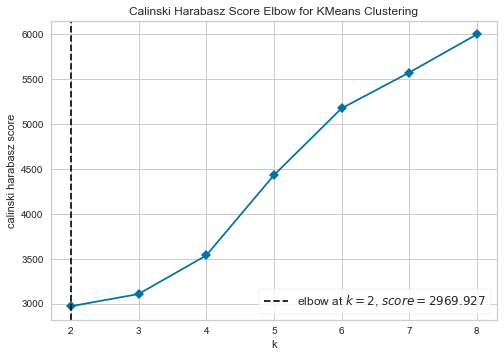

In [24]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=False)

visualizer.fit(features)    
visualizer.poof();

In [25]:
kmeans = KMeans(n_clusters = 2,random_state = 111)
kmeans.fit(scaled_features)

KMeans(n_clusters=2, random_state=111)
pd.Series(kmeans.labels_).value_counts()

1    1181
0     791
dtype: int64

791 are almost empty group and group 1 is larger.


In [26]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['groups'] = preds
kmeans_df.head(15)

,FacilityName,BagQty,ItemQty,PackQty,PatientQty,groups
Date,,,,,,
January,Branch A49,507,1665,2545,429,1
January,Branch A124,434,1545,1821,377,1
January,Branch A188,721,2304,2684,631,1
January,Branch A126,956,3890,4875,784,0
January,Branch A180,1519,4448,5901,1346,0
January,Branch A37,232,609,816,215,1
January,Branch A47,1058,2027,3965,849,1
January,Branch A75,687,2564,4112,548,1
January,Branch A64,1148,2853,4624,926,0


In [27]:
kmeans_df.query('groups == 1')

,FacilityName,BagQty,ItemQty,PackQty,PatientQty,groups
Date,,,,,,
January,Branch A49,507,1665,2545,429,1
January,Branch A124,434,1545,1821,377,1
January,Branch A188,721,2304,2684,631,1
January,Branch A37,232,609,816,215,1
January,Branch A47,1058,2027,3965,849,1
...,...,...,...,...,...,...
December,Branch A101,497,1632,2437,391,1
December,Branch A169,988,2355,4398,804,1
December,Branch A78,239,633,838,218,1


In [28]:
cols = ['BagQty', 'ItemQty', 'PackQty', 'PatientQty']

In [29]:
np.unique(kmeans_df.index)

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [30]:
np.unique(kmeans_df.index)[0]

'April'

In [31]:
df_4 = pd.DataFrame()

for i in cols:
    df_4[i] = kmeans_df[i].mean()#(axis=1)

In [32]:
kmeans_df.loc[np.unique(kmeans_df.index)[0]]

,FacilityName,BagQty,ItemQty,PackQty,PatientQty,groups
Date,,,,,,
April,Branch A115,835,2276,2727,734,1
April,Branch A49,546,1800,2820,447,1
April,Branch A124,480,1598,1877,433,1
April,Branch A188,305,1267,1496,227,1
April,Branch A126,1150,4590,5784,856,0
...,...,...,...,...,...,...
April,Branch A55,859,2144,4198,613,1
April,Branch A169,1581,3637,6484,1175,0
April,Branch A12,1225,4134,5787,1000,0


In [33]:
np.unique(kmeans_df.index)

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [34]:
df_4 = pd.DataFrame()

for mon in np.unique(kmeans_df.index):
    index = kmeans_df[cols].loc[mon]
#     for i in cols:
    df_4[mon] = index.mean()#axis=1)
#         print(index)
#         break
#     break
df_4 = df_4.T

In [35]:
df_4

,BagQty,ItemQty,PackQty,PatientQty
April,948.397436,2617.250000,3914.051282,741.717949
August,931.337423,2672.625767,3994.662577,738.104294
December,869.111111,2538.158730,3828.386243,697.894180
February,872.180645,2453.741935,3646.090323,704.929032
January,932.462963,2650.364198,3940.975309,742.506173
July,1001.974522,2834.878981,4238.579618,777.114650
June,1005.480769,2818.467949,4199.185897,784.243590
March,1022.193548,2809.270968,4194.645161,775.554839
May,941.564103,2649.570513,3952.557692,749.160256
November,838.759162,2424.115183,3632.617801,676.356021


In [36]:
df_4.shape[0]

12

In [37]:
df_4

,BagQty,ItemQty,PackQty,PatientQty
April,948.397436,2617.250000,3914.051282,741.717949
August,931.337423,2672.625767,3994.662577,738.104294
December,869.111111,2538.158730,3828.386243,697.894180
February,872.180645,2453.741935,3646.090323,704.929032
January,932.462963,2650.364198,3940.975309,742.506173
July,1001.974522,2834.878981,4238.579618,777.114650
June,1005.480769,2818.467949,4199.185897,784.243590
March,1022.193548,2809.270968,4194.645161,775.554839
May,941.564103,2649.570513,3952.557692,749.160256
November,838.759162,2424.115183,3632.617801,676.356021


In [38]:
# df_4['Total']=0
# df_4['Total']=df_4.sum(axis=1)#[i]
# # df_4.T

In [39]:
df_4

,BagQty,ItemQty,PackQty,PatientQty
April,948.397436,2617.250000,3914.051282,741.717949
August,931.337423,2672.625767,3994.662577,738.104294
December,869.111111,2538.158730,3828.386243,697.894180
February,872.180645,2453.741935,3646.090323,704.929032
January,932.462963,2650.364198,3940.975309,742.506173
July,1001.974522,2834.878981,4238.579618,777.114650
June,1005.480769,2818.467949,4199.185897,784.243590
March,1022.193548,2809.270968,4194.645161,775.554839
May,941.564103,2649.570513,3952.557692,749.160256
November,838.759162,2424.115183,3632.617801,676.356021


In [40]:
df_4.corr()

,BagQty,ItemQty,PackQty,PatientQty
BagQty,1.000000,0.959130,0.948653,0.959193
ItemQty,0.959130,1.000000,0.997604,0.965113
PackQty,0.948653,0.997604,1.000000,0.948388
PatientQty,0.959193,0.965113,0.948388,1.000000


# Second Phase

It is easier to do a Monte Carlo simulation of this type, as follows:
1. A random number is extracted from the distribution of the number of annual events.
2. If events occur from the previous point, extractions are made from the distribution of losses.
3. Finally, we add the values of the extractions we performed to obtain a value that represents an annual loss caused by events.

Monte Carlo methods allow you to simulate the behavior of an event of interest and, in general, return as a result a random variable whose properties, such as mean, variance, probability density function, and so on, provide us with important information on the quality of the simulation.

REF: Hands-On Simulation Modeling with Python (Giuseppe Ciaburro)

The Monte Carlo method is essentially a numerical method for calculating the expected value of random variables; that is, an expected value that cannot be easily obtained through direct calculation. To obtain this result, the Monte Carlo method is based on two fundamental theorems of statistics: the law of large numbers and the central
limit theorem.

In [41]:
df_4.columns

Index(['BagQty', 'ItemQty', 'PackQty', 'PatientQty'], dtype='object')

In [42]:
data = df_4['PatientQty'].values

#### Central limit theorem

In [43]:
a = min(data)#0.0
b = max(data)#3.0
N=10000

# generate the uniform distribution 
DataPop=list(np.random.uniform(a,b,N))

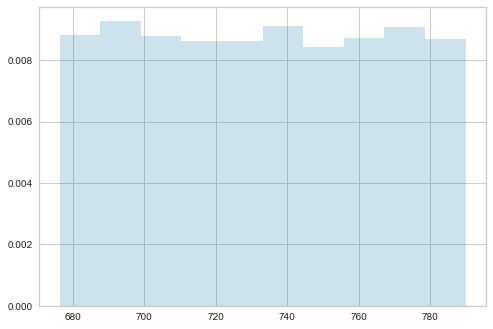

In [44]:
plt.hist(DataPop, density=True, histtype='stepfilled',
alpha=0.2)
plt.show()



[`Notes`]

- The distribution appears evidently uniform.

In [45]:
min(DataPop)

676.3616401039144

In [46]:
max(DataPop)

789.8447714307366

In [47]:
import random

In [48]:
len(DataPop)

10000

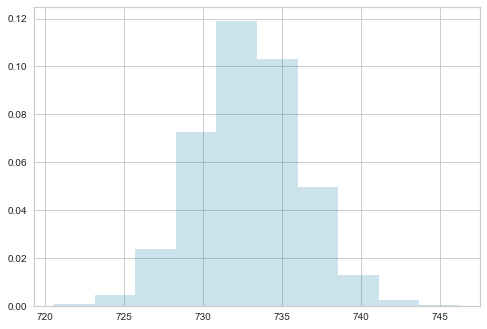

In [49]:
# extraction of the samples from the generated population
SamplesMeans = []
for i in range(0,10000):
    DataExtracted = random.sample(DataPop,k=100)
    DataExtractedMean = np.mean(DataExtracted)
    SamplesMeans.append(DataExtractedMean)
plt.figure()
plt.hist(SamplesMeans, density=True, histtype='stepfilled',
alpha=0.2)
plt.show()

[`Notes`]

- The Gaussian distribution's iconic bell-shaped curve has now developed in the distribution. This indicates that the central limit theorem has been proven.

In [50]:
SamplesMeans

[728.8386405896707,
 730.9899200970893,
 727.2920799235503,
 729.00406652722,
 734.2850137203419,
 742.960203892937,
 734.8047724159085,
 721.7883077454115,
 733.5681660460815,
 731.2534955962303,
 731.7406736758364,
 733.080659284434,
 735.2512040059787,
 729.2135363321613,
 729.7334482732854,
 727.1641112765557,
 731.1663329933494,
 733.2562900212117,
 733.4649412732039,
 733.2066796194194,
 731.0682226527865,
 727.1407651070336,
 730.0236114804152,
 731.8794804774171,
 729.953450011487,
 731.8759820383524,
 727.1199147841975,
 732.4076126528032,
 738.7138677323419,
 736.211781005899,
 735.9109361009623,
 732.2300286619939,
 731.1842152767891,
 732.643080854873,
 725.3116851206358,
 730.9119220047745,
 728.63616176635,
 732.5004391689063,
 726.9517747180838,
 737.334558796751,
 734.1313859173778,
 730.2282577885479,
 728.6488497494331,
 726.5570333999735,
 735.4447156286516,
 728.2052701481422,
 730.6400873135178,
 733.8682034007351,
 729.2709391230486,
 733.570918078972,
 733.775980

In [51]:
min(SamplesMeans)

720.562751318909

In [52]:
max(SamplesMeans)

746.2869089957084

In [53]:
def make_simulation(datas, NumSteps=10000):


    a = min(datas)#0.0
    b = max(datas)#3.0
    N=10000
    print(f'min: {a} and max: {b}')
    # generate the uniform distribution 
    DataPop=list(np.random.uniform(a,b,N))

    # extraction of the samples from the generated population
    SamplesMeans = []
    data_ = []
    for i in range(0,10000):
        DataExtracted = random.sample(DataPop,k=100)
        DataExtractedMean = np.mean(DataExtracted)
        SamplesMeans.append(DataExtractedMean)
        data_.append(DataExtracted[0])
#     plt.figure()
#     plt.hist(SamplesMeans, density=True, histtype='stepfilled',
#     alpha=0.2)
#     plt.show()
    return data_



In [54]:
df.columns

Index(['FacilityName', 'BagQty', 'ItemQty', 'PackQty', 'PatientQty', 'groups'], dtype='object')

make simulation

In [55]:
BagQty_sims = make_simulation(df_4['BagQty'].values)

min: 838.7591623036649 and max: 1022.1935483870968


In [56]:
ItemQty_sims = make_simulation(df_4['ItemQty'].values)

min: 2424.1151832460732 and max: 2853.818181818182


In [57]:
PackQty_sims = make_simulation(df_4['PackQty'].values)

min: 3632.6178010471203 and max: 4268.957575757576


In [58]:
PatientQty_sims = make_simulation(df_4['PatientQty'].values)

min: 676.3560209424083 and max: 789.8484848484849


In [59]:
# preview the first 10 values of the simulated Patient Qty
PatientQty_sims[:10]

[744.5244314806482,
 693.0695467870523,
 687.882850051706,
 785.9964647696947,
 715.8933576296022,
 776.3835674859307,
 718.7526576393502,
 752.285496296646,
 713.4882710630553,
 789.7685176142863]

make new dataframe with simulated data

In [60]:
cols = ['BagQty', 'ItemQty', 'PackQty', 'PatientQty']

In [61]:
BagQty_sims = BagQty_sims
ItemQty_sims = ItemQty_sims
PackQty_sims = PackQty_sims
PatientQty_sims = PatientQty_sims

In [62]:
n = {'BagQty': BagQty_sims,
     'ItemQty':ItemQty_sims,
     'PackQty':PackQty_sims, 
     'PatientQty':PatientQty_sims
    
    
    }

In [63]:
sim_df = pd.DataFrame(n)

In [64]:
sim_df.head()

,BagQty,ItemQty,PackQty,PatientQty
0,880.885709,2555.303067,3824.404492,744.524431
1,1001.673369,2552.926308,4082.090881,693.069547
2,955.836524,2586.126527,3721.443140,687.882850
3,869.047488,2585.132033,3839.247366,785.996465
4,863.784957,2748.982251,3975.855155,715.893358


In [65]:
sim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BagQty      10000 non-null  float64
 1   ItemQty     10000 non-null  float64
 2   PackQty     10000 non-null  float64
 3   PatientQty  10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


In [66]:
# save the simulated dataset
sim_df.to_csv('simulated.csv')

In [67]:
sim_df.to_excel('simulated.xlsx')

In [68]:
sim_df[:1200].mean()


BagQty         928.476598
ItemQty       2635.536480
PackQty       3951.365387
PatientQty     734.185033
dtype: float64

In [69]:
# get 10 years data
sim_10_df = sim_df[:1200]
sim_10_df.head()

,BagQty,ItemQty,PackQty,PatientQty
0,880.885709,2555.303067,3824.404492,744.524431
1,1001.673369,2552.926308,4082.090881,693.069547
2,955.836524,2586.126527,3721.443140,687.882850
3,869.047488,2585.132033,3839.247366,785.996465
4,863.784957,2748.982251,3975.855155,715.893358


In [70]:
sim_10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BagQty      1200 non-null   float64
 1   ItemQty     1200 non-null   float64
 2   PackQty     1200 non-null   float64
 3   PatientQty  1200 non-null   float64
dtypes: float64(4)
memory usage: 37.6 KB


join simulated years and actual year

In [71]:
qty_df = sim_10_df
qty_df.head()

,BagQty,ItemQty,PackQty,PatientQty
0,880.885709,2555.303067,3824.404492,744.524431
1,1001.673369,2552.926308,4082.090881,693.069547
2,955.836524,2586.126527,3721.443140,687.882850
3,869.047488,2585.132033,3839.247366,785.996465
4,863.784957,2748.982251,3975.855155,715.893358


In [72]:
sim_10_df

,BagQty,ItemQty,PackQty,PatientQty
0,880.885709,2555.303067,3824.404492,744.524431
1,1001.673369,2552.926308,4082.090881,693.069547
2,955.836524,2586.126527,3721.443140,687.882850
3,869.047488,2585.132033,3839.247366,785.996465
4,863.784957,2748.982251,3975.855155,715.893358
...,...,...,...,...
1195,1002.094813,2604.251741,3925.340627,750.712243
1196,935.006698,2553.278237,4260.779919,742.091977
1197,904.563760,2439.816939,3656.908536,775.039650
1198,852.374902,2823.789878,3720.553551,710.513391


In [73]:
# datetime = pd.date_range('1772-01-01', periods=qty_df.shape[0], tz='Europe/London', freq='M')
# datetime

In [74]:
datetime = pd.date_range('1922-01-01', periods=qty_df.shape[0], tz='Europe/London', freq='M')
datetime

DatetimeIndex(['1922-01-31 00:00:00+00:00', '1922-02-28 00:00:00+00:00',
               '1922-03-31 00:00:00+01:00', '1922-04-30 00:00:00+01:00',
               '1922-05-31 00:00:00+01:00', '1922-06-30 00:00:00+01:00',
               '1922-07-31 00:00:00+01:00', '1922-08-31 00:00:00+01:00',
               '1922-09-30 00:00:00+01:00', '1922-10-31 00:00:00+00:00',
               ...
               '2021-03-31 00:00:00+01:00', '2021-04-30 00:00:00+01:00',
               '2021-05-31 00:00:00+01:00', '2021-06-30 00:00:00+01:00',
               '2021-07-31 00:00:00+01:00', '2021-08-31 00:00:00+01:00',
               '2021-09-30 00:00:00+01:00', '2021-10-31 00:00:00+01:00',
               '2021-11-30 00:00:00+00:00', '2021-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', length=1200, freq='M')

In [75]:
# set df to a new variable
pharma_df = qty_df.reset_index().drop('index', axis=1)
pharma_df.head()

,BagQty,ItemQty,PackQty,PatientQty
0,880.885709,2555.303067,3824.404492,744.524431
1,1001.673369,2552.926308,4082.090881,693.069547
2,955.836524,2586.126527,3721.443140,687.882850
3,869.047488,2585.132033,3839.247366,785.996465
4,863.784957,2748.982251,3975.855155,715.893358


join new datetime to the pharma_df

In [76]:
pharma_df['date'] = pd.to_datetime(datetime.date)

In [77]:
pharma_df['month'] = pharma_df['date'].dt.month_name()

In [78]:
pharma_df['weekday'] = pharma_df['date'].dt.day_name()


In [79]:
pharma_df.set_index('date', inplace=True)

In [80]:
pharma_df.head()

,BagQty,ItemQty,PackQty,PatientQty,month,weekday
date,,,,,,
1922-01-31,880.885709,2555.303067,3824.404492,744.524431,January,Tuesday
1922-02-28,1001.673369,2552.926308,4082.090881,693.069547,February,Tuesday
1922-03-31,955.836524,2586.126527,3721.443140,687.882850,March,Friday
1922-04-30,869.047488,2585.132033,3839.247366,785.996465,April,Sunday
1922-05-31,863.784957,2748.982251,3975.855155,715.893358,May,Wednesday


In [81]:
pharma_df.columns


Index(['BagQty', 'ItemQty', 'PackQty', 'PatientQty', 'month', 'weekday'], dtype='object')

In [82]:
pharma_df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='date', length=1200)

In [83]:
pharma_df.to_csv('simulated-with-date.csv')

In [84]:
pharma_df

,BagQty,ItemQty,PackQty,PatientQty,month,weekday
date,,,,,,
1922-01-31,880.885709,2555.303067,3824.404492,744.524431,January,Tuesday
1922-02-28,1001.673369,2552.926308,4082.090881,693.069547,February,Tuesday
1922-03-31,955.836524,2586.126527,3721.443140,687.882850,March,Friday
1922-04-30,869.047488,2585.132033,3839.247366,785.996465,April,Sunday
1922-05-31,863.784957,2748.982251,3975.855155,715.893358,May,Wednesday
...,...,...,...,...,...,...
2021-08-31,1002.094813,2604.251741,3925.340627,750.712243,August,Tuesday
2021-09-30,935.006698,2553.278237,4260.779919,742.091977,September,Thursday
2021-10-31,904.563760,2439.816939,3656.908536,775.039650,October,Sunday


# Classification Model

Separate the dataframe into X and Y

In [160]:
df = pd.read_excel("D:/LLoyds/simulated-with-date_3000_sample.xlsx", index_col=[0])#.reset_index()
df#.head()

,BagQty,ItemQty,PackQty,PatientQty
Date,,,,
1772-01-31,928,2612,4132,744
1772-02-29,872,2674,3917,678
1772-03-31,878,2643,4113,741
1772-04-30,893,2770,4027,703
1772-05-31,985,2473,4104,694
...,...,...,...,...
2021-08-31 00:00:00,886,2717,3877,759
2021-09-30 00:00:00,884,2429,3970,771
2021-10-31 00:00:00,991,2686,3770,738


In [161]:
sample= df[:1200]

In [162]:
X=sample.values
Y=sample['PatientQty'].values

In [163]:
Y

array([744, 678, 741, ..., 769, 789, 782], dtype=int64)

In [164]:
X=np.delete(X,1,axis=1)

In [165]:
X

array([[ 928, 4132,  744],
       [ 872, 3917,  678],
       [ 878, 4113,  741],
       ...,
       [ 962, 4065,  769],
       [ 994, 3875,  789],
       [ 961, 3954,  782]], dtype=int64)

In [166]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)

#view transformed values
print(y_transformed)

[ 68   2  65 ...  93 113 106]


Split the data set into 70% trainig and 30% test 

In [167]:
import sklearn as sk
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=118833)

Build Decission Tree Classifier

In [168]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=None)
dt_clf.fit(X_train, Y_train)
dt_clf.score(X_test, Y_test)

Y_pred = dt_clf.predict(X_test)
dt_clf.score(X_test, Y_test)

1.0

In [169]:
Y_pred = dt_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

Random Forest Classifier

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [171]:
classifier = RandomForestClassifier(random_state=50, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20], 
    'min_samples_leaf': [3,5,10,20,50],
    'n_estimators': [10,25,30,50,100]
} # ,3,5,10,20 , 3, 5,10,20,50,25,30,50,100

In [172]:
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=params,
    cv = 4,
    n_jobs=-1, 
    verbose=1, 
    scoring="accuracy"
    
)

In [173]:
%%time
grid_search.fit(X, Y) # training the model

Fitting 4 folds for each of 125 candidates, totalling 500 fits


C:\Users\44743\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


CPU times: total: 2.28 s
Wall time: 18.5 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [3, 5, 10, 20, 50],
                         'n_estimators': [10, 25, 30, 50, 100]},
             scoring='accuracy', verbose=1)

In [174]:
# our model is the best estimator seleted by the grid search
model = grid_search.best_estimator_
model

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       n_jobs=-1, random_state=50)

In [175]:
# check the score of the metric specified in the grid search, 
# 'accuracy' of the simulated data sample
score = model.score(X_test, Y_test)
score # model has an accuracy around 81%

0.8138888888888889

In [176]:
results = X_test
prediction= model.predict(X_test)


In [177]:
X_test

array([[ 988, 3961,  760],
       [ 839, 4172,  709],
       [1011, 3949,  785],
       ...,
       [ 845, 3999,  753],
       [ 852, 3789,  752],
       [ 854, 4038,  787]], dtype=int64)

In [178]:
results['PatientQty_predict']=prediction
results['PatientyQty_actual']= Y_test

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [179]:
prediction.size

360

In [180]:
results

array([[ 988, 3961,  760],
       [ 839, 4172,  709],
       [1011, 3949,  785],
       ...,
       [ 845, 3999,  753],
       [ 852, 3789,  752],
       [ 854, 4038,  787]], dtype=int64)

# Statistical Models

Concept

The timely delivery of medicines is one of the industry's biggest challenges. Forecasting demand is therefore necessary. This study examines the applicability of ARIMA models and machine learning methods like the Random Forest Regressor Neural Network and Recurrent Neural Network to demand forecasting.

We used a one-year pseudonymized data collection from Lloyds Pharmacy patient orders for our studies, and then we used the Monte Carlo Simulation to add new entries.

In [85]:
#to visualise the stationarity of the data set
cols_to_plot = ['BagQty', 'ItemQty','PackQty','PatientQty']


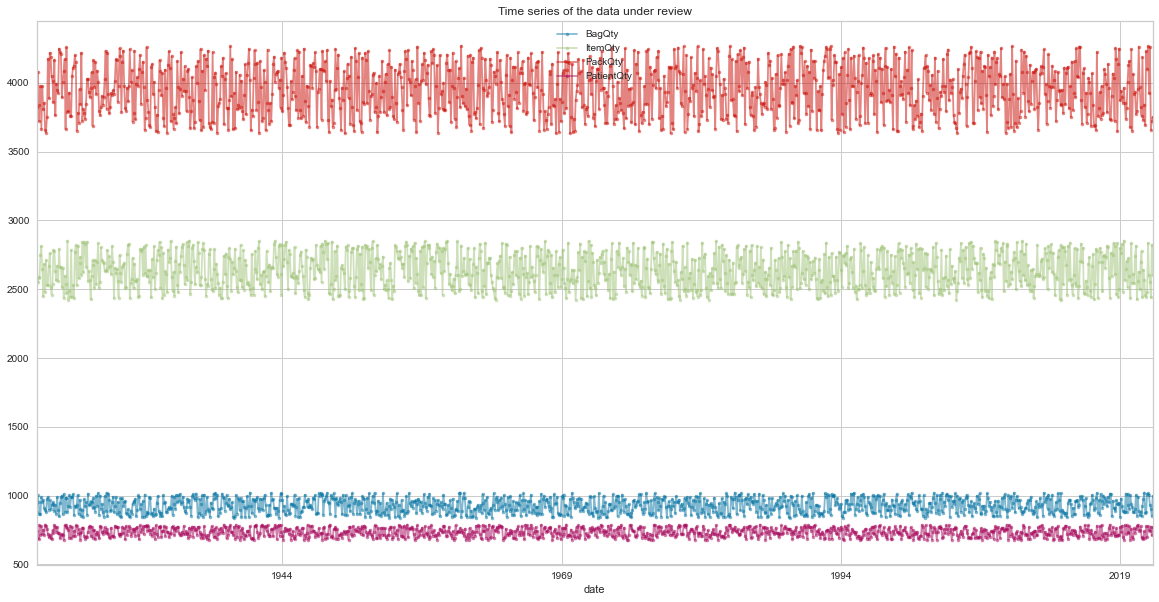

In [86]:
axes = pharma_df[cols_to_plot].plot(marker=".", alpha=0.5, figsize=(20, 10), subplots=False)
axes.set_title('Time series of the data under review')
plt.show()

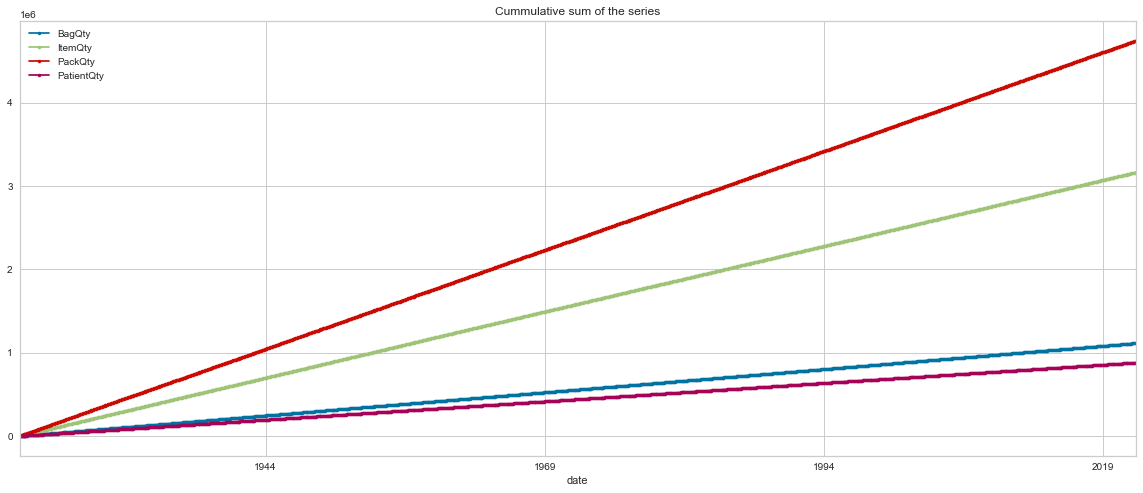

In [87]:
ts = pharma_df[cols_to_plot].cumsum()
axes = ts.plot(figsize=(20,8), marker='.')
axes.set_title('Cummulative sum of the series')
plt.show()

In [88]:
pharma_df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1200 non-null   datetime64[ns]
 1   BagQty      1200 non-null   float64       
 2   ItemQty     1200 non-null   float64       
 3   PackQty     1200 non-null   float64       
 4   PatientQty  1200 non-null   float64       
 5   month       1200 non-null   object        
 6   weekday     1200 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 65.8+ KB


In [89]:
pharma_df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='date', length=1200)

## PatientQty is our target to forecast.

In [90]:
patientqty = pharma_df[['PatientQty']]#.resample('M').mean()

In [91]:
patientqty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 1922-01-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PatientQty  1200 non-null   float64
dtypes: float64(1)
memory usage: 18.8 KB


In [92]:
patientqty

,PatientQty
date,
1922-01-31,744.524431
1922-02-28,693.069547
1922-03-31,687.882850
1922-04-30,785.996465
1922-05-31,715.893358
...,...
2021-08-31,750.712243
2021-09-30,742.091977
2021-10-31,775.039650


In [93]:
patientqty.describe()

,PatientQty
count,1200.000000
mean,734.185033
std,32.567779
min,676.454727
25%,708.201962
50%,733.414362
75%,764.347076
max,789.768518


[`Notes`]

- We can confirm the significant increase in each column in the last 6 years

- We can see the quantity in each column has undergone significant fluctuations given the very high value of the standard deviation.

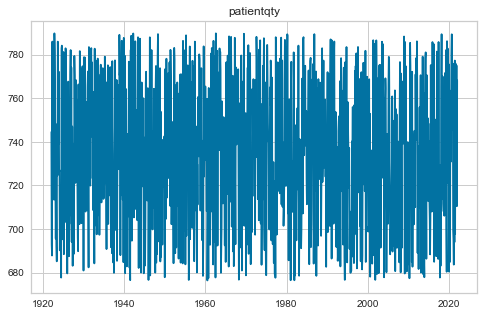

In [94]:
plt.figure(figsize=(8,5))
# for i in cols:
# plt.figure(figsize=(12,8))

plt.title('patientqty')
plt.plot(patientqty)

plt.show()

[`Notes`]

- There is seasonal trends in the data.

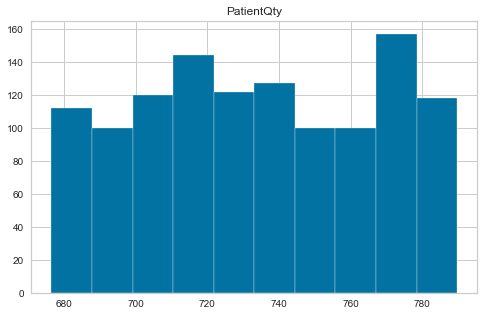

In [95]:
hist = patientqty.hist(bins=10, figsize=(8,5))


Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing.

# Forecasting

In [96]:
#to visualise the stationarity of the data set
# cols_to_plot = ['PatientQty']


In [97]:
from statsmodels.tsa.stattools import adfuller


In [98]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

In [99]:
# series = pharma_df[cols]
# series

In [100]:
series = patientqty.reset_index().melt(id_vars=["date"],
        value_name="qty").drop(['variable'], axis=1).set_index('date')
series

,qty
date,
1922-01-31,744.524431
1922-02-28,693.069547
1922-03-31,687.882850
1922-04-30,785.996465
1922-05-31,715.893358
...,...
2021-08-31,750.712243
2021-09-30,742.091977
2021-10-31,775.039650


In [101]:
# series = series.resample('M').mean()

resample the series to year in order to have a better view of the plot.

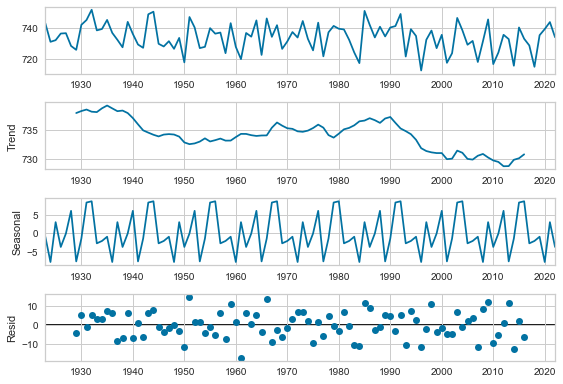

In [102]:
from statsmodels.tsa import seasonal

decomp = seasonal.seasonal_decompose(series.resample('Y').mean(), period=12)
decomp.plot();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

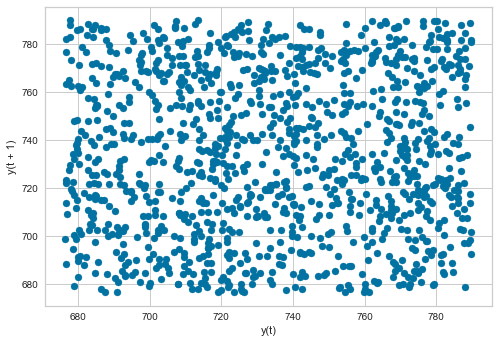

In [103]:
from pandas.plotting import lag_plot
lag_plot(series)

                   qty
date                  
1922-01-31  744.524431
1922-02-28  693.069547
1922-03-31  687.882850
1922-04-30  785.996465
1922-05-31  715.893358


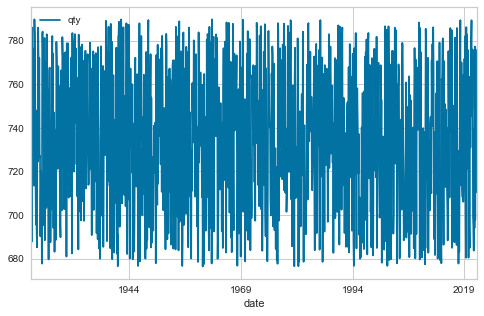

In [104]:

print(series.head())
# line plot
series.plot(figsize=(8,5))
plt.show()

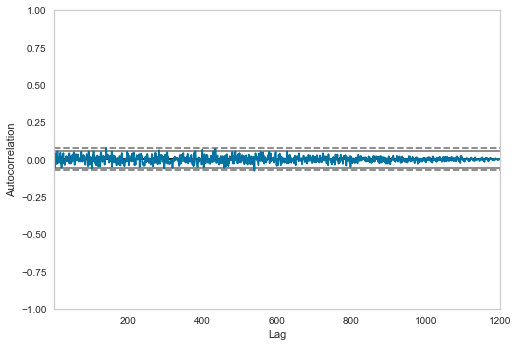

In [105]:
# autocorrelation plot

from pandas.plotting import autocorrelation_plot
# plt.figure(figsize=(10,5))
autocorrelation_plot(series, )
plt.show()

In [106]:
!pip install pmdarima

C:\Users\44743\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


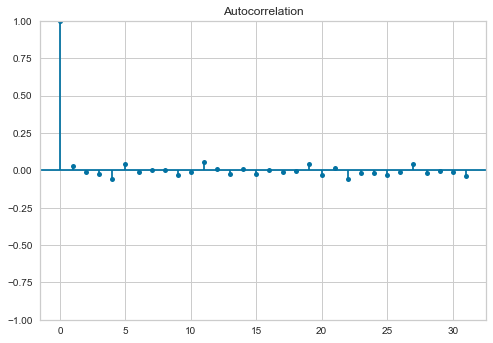

In [107]:
import pmdarima as pm

pm.plot_acf(series)

In [108]:
def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test :{title}\n')
    results=adfuller(series.dropna(),autolag='AIC')
    labels=['ADF Test Statistics','P_value','# lags Used','# Observations']
    out=pd.Series(results[0:4],index=labels)
    
    for key,val in results[4].items():
        out[f'Critical Value :({key})']=val
    
    print(out.to_string())
    print()
    if results[1]<=0.05:
        print('Strong Evidence against the Null Hypothesis')
        print('Reject the Null Hypothesis Testing')
        print('Data has no unit root and it is Stationary')
    else:
        print('Waek Evidence against the Null Hypothesis')
        print('Failed to reject the Null Hypothesis Testing')
        print('Data has unit root and it is Non Stationary')

In [109]:
adf_test(series)

Augmented Dickey-Fuller Test :

ADF Test Statistics       -33.492233
P_value                     0.000000
# lags Used                 0.000000
# Observations           1199.000000
Critical Value :(1%)       -3.435816
Critical Value :(5%)       -2.863954
Critical Value :(10%)      -2.568055

Strong Evidence against the Null Hypothesis
Reject the Null Hypothesis Testing
Data has no unit root and it is Stationary


In [110]:
from sklearn.metrics import mean_squared_error


In [111]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(419)

In [112]:
# from sktime.forecasting.model_selection import temporal_train_test_split

# y_train, y_test = temporal_train_test_split(series, test_size=100)

In [113]:
data = series.copy()

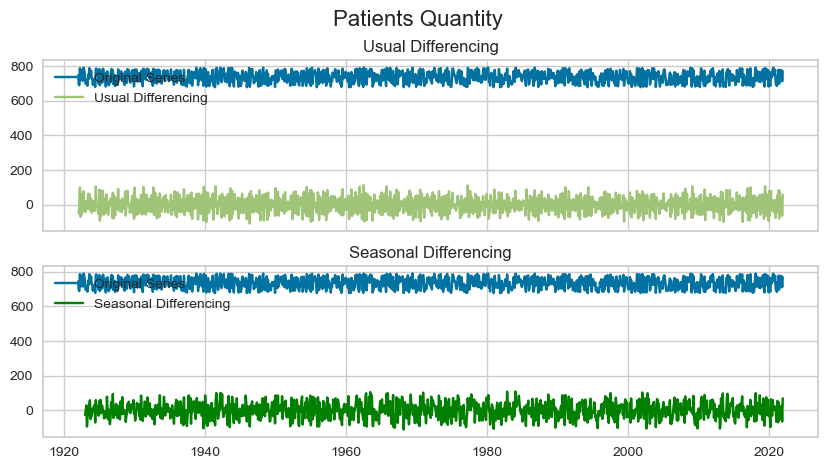

In [114]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Patients Quantity', fontsize=16)
plt.show()

`Notes`
- The seasonal spikes are still present after applying the standard differencing, as is evident (lag 1). However, it is corrected upon seasonal differencing.

In [115]:
# y_train = series[series.index < "2000"]
# y_test = series[series.index >= "2000"]

In [116]:
from pmdarima import model_selection

# #############################################################################
train, test = model_selection.train_test_split(series, train_size=90)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=788.625, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=789.494, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=789.974, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=787.884, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=787.663, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=788.969, Time=0.19 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=786.594, Time=0.17 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=786.384, Time=0.26 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=787.033, Time=0.53 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=787.472, Time=0.68 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=785.477, Time=0.50 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=787.034, Time=0.50 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=787.063, Time=0.52 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=788.472, Time=0.87 sec
 ARIMA(0,0,0)(0,1,2)[12]         

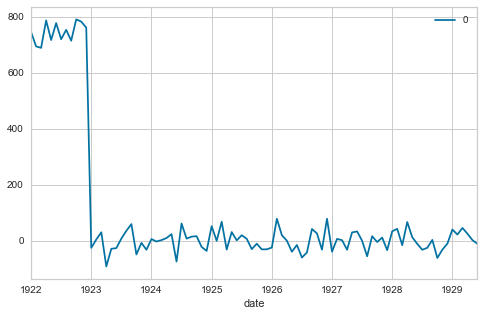

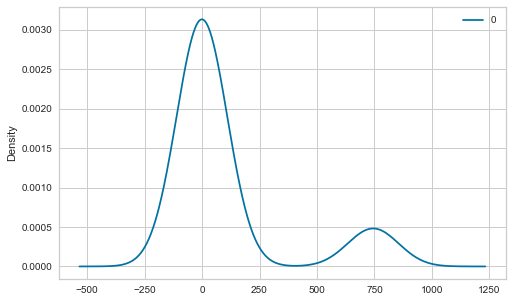

                0
count   90.000000
mean    98.396004
std    257.191716
min    -92.699315
25%    -26.191944
50%      5.530793
75%     38.072355
max    790.622263


In [117]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(smodel.summary())

# line plot of residuals
residuals = pd.DataFrame(smodel.resid()) 

# plt.figure(figsize=(8,5))
residuals.plot(figsize=(8,5))
plt.show()

# density plot of residuals
residuals.plot(kind='kde', figsize=(8,5)) 
plt.show()

# summary stats of residuals
print(residuals.describe())



`Notes`

- The best model SARIMAX (0,1,1)(0,1,1)has an AIC of 789.008 and the P Values are not significant, since P values are less than 0.05 the residuals are independent.

In [118]:
from sklearn.metrics import mean_squared_error

# Create predictions for the future, evaluate on test
preds, conf_int = smodel.predict(n_periods=test.shape[0], return_conf_int=True)

sarima_rmse = np.sqrt(mean_squared_error(test, preds))

# Print the error:
print("Test RMSE: %.3f" % sarima_rmse)

Test RMSE: 58.878


How to interpret the residual plots in SARIMA model 

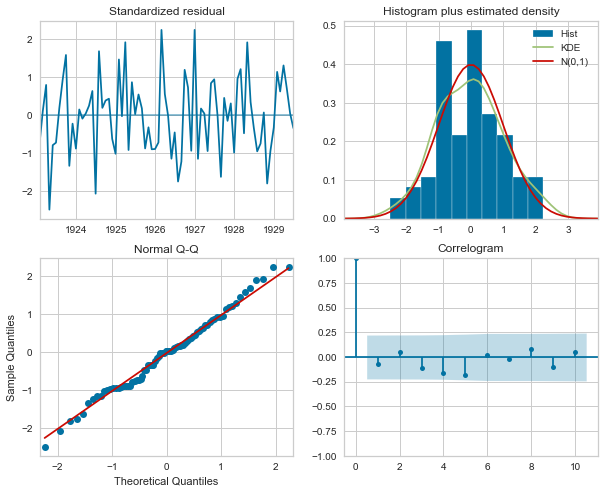

In [119]:
smodel.plot_diagnostics(figsize=(10,8))
plt.show()

Interpretation of plots in plot diagnostics


`Notes`

- Top left: The residual errors appear to have a uniform variation and fluctuate around a mean of zero.
- Top Right: Inferred from the density map is a normal distribution with a mean of 0.
- Bottom Left: The red line completely aligns with each and every dot. Any notable variations suggest that the distribution is skewed.
- Bottom Right: The ACF plot reveals that there is no autocorrelation in the residual errors. Any autocorrelation would suggest that the residual errors exhibit a pattern that is not accounted for by the model.

In [120]:
# # #############################################################################
# # Plot the points and the forecasts
# x_axis = np.arange(train.shape[0] + preds.shape[0])
# x_years = x_axis + 2021  # Year starts at 1821

# plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
# plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
# plt.scatter(x_years[x_axis[train.shape[0]:]], test,
#             alpha=0.4, marker='x')  # Test data
# plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
#                  conf_int[:, 0], conf_int[:, 1],
#                  alpha=0.1, color='b')
# plt.title("Lynx forecasts")
# plt.xlabel("Year")

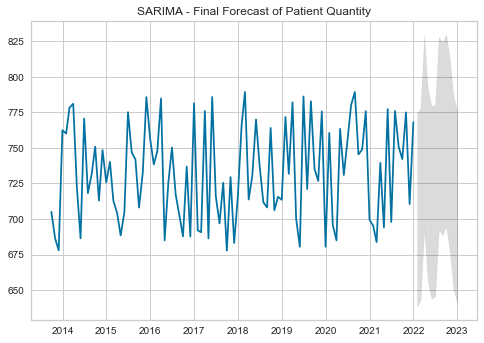

In [121]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range('2022-01-01', periods = n_periods, freq='M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data[1100:])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Patient Quantity")
plt.show()


In [122]:
forecasted = pd.DataFrame(fitted, index=index_of_fc, columns=['Forecasted'])
forecasted

,Forecasted
2022-01-31,NaN
2022-02-28,NaN
2022-03-31,NaN
2022-04-30,NaN
2022-05-31,NaN
2022-06-30,NaN
2022-07-31,NaN
2022-08-31,NaN
2022-09-30,NaN
2022-10-31,NaN


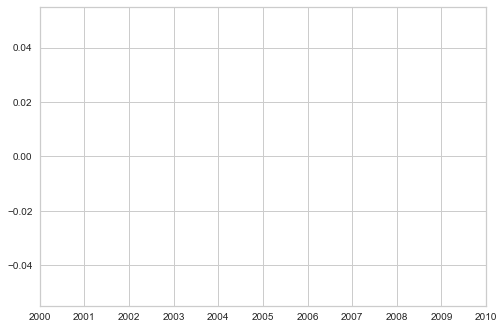

In [123]:
plt.plot(forecasted)

### Random Forest Regression

In [124]:
#clean_3000_df = pd.read_csv('data/3000 CLEANED SIMULATED DATA.csv').set_index('date')
#clean_3000_df.head()

In [125]:
#clean_3000_df.columns

In [126]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [127]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = np.asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

In [130]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
#     error = mean_absolute_error(test[:, -1], predictions)
    error = np.sqrt(mean_squared_error(test[:, -1], predictions))
    return error, test[:, -1], predictions

In [131]:
# np.sqrt(mean_squared_error(test, preds)))

In [132]:
series_p = series

# ['PatientQty'].melt(id_vars=["date"],
#         value_name="qty").set_index('date')
# series_p

In [133]:
values = series.values


In [134]:
#values =pd.DataFrame( clean_3000_df.PatientQty.values)# clean_3000_df.values
# values = clean_3000_df.values

# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)

In [135]:
data

array([[744.52443148, 693.06954679, 687.88285005, ..., 715.89335763,
        776.38356749, 718.75265764],
       [693.06954679, 687.88285005, 785.99646477, ..., 776.38356749,
        718.75265764, 752.2854963 ],
       [687.88285005, 785.99646477, 715.89335763, ..., 718.75265764,
        752.2854963 , 713.48827106],
       ...,
       [694.01939448, 777.2977666 , 697.892748  , ..., 750.71224266,
        742.09197654, 775.0396505 ],
       [777.2977666 , 697.892748  , 775.97416751, ..., 742.09197654,
        775.0396505 , 710.51339134],
       [697.892748  , 775.97416751, 750.71224266, ..., 775.0396505 ,
        710.51339134, 768.13986585]])

In [136]:
# evaluate
random_forest_regressor_rmse, y, yhat = walk_forward_validation(data, 12)
print('RSME: %.3f' % random_forest_regressor_rmse)

>expected=695.1, predicted=739.1
>expected=683.7, predicted=722.9
>expected=739.5, predicted=732.2
>expected=694.0, predicted=729.9
>expected=777.3, predicted=742.9
>expected=697.9, predicted=731.1
>expected=776.0, predicted=725.8
>expected=750.7, predicted=732.2
>expected=742.1, predicted=738.6
>expected=775.0, predicted=732.3
>expected=710.5, predicted=733.2
>expected=768.1, predicted=745.2
RSME: 32.708


In [181]:
#random_forest_regressor_rmse=35.508

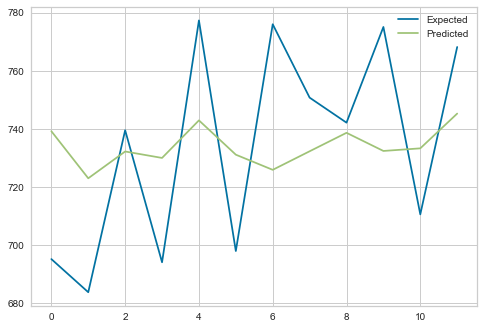

In [138]:
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

# RNN Forecast Model

 Data Preparation
 
 This involves framing the dataset as a supervised learning problem and normalizing the input variables.
 
 We will frame the supervised learning problem as predicting the PatientQty at the current month (t) given the PatientQty measurement and the other QTY's at the prior time step.
 

In [139]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [140]:

from sklearn.preprocessing import MinMaxScaler

In [141]:
values = series.values

values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled,1, 1)

print(reframed.head())

   var1(t-1)   var1(t)
1   0.600719  0.146627
2   0.146627  0.100854
3   0.100854  0.966712
4   0.966712  0.348048
5   0.348048  0.881877


Define and Fit Model

 split the prepared dataset into train and test sets. To speed up the training of the model for this demonstration,

In [142]:
# lenp

In [143]:
# split data

# split into train and test sets
values = reframed.values
n_train_hours = 12#365#65 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(12, 1, 1) (12,) (1187, 1, 1) (1187,)


In [144]:
test

array([[0.35946798, 0.16933107],
       [0.16933107, 0.35106134],
       [0.35106134, 0.13901901],
       ...,
       [0.57925224, 0.8700175 ],
       [0.8700175 , 0.30056953],
       [0.30056953, 0.80912685]], dtype=float32)

In [145]:
n_train_hours

12

In [146]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [147]:
!pip install tensorflow

In [148]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN

Epoch 1/100
1/1 - 5s - loss: 0.4837 - val_loss: 0.3835 - 5s/epoch - 5s/step
Epoch 2/100
1/1 - 0s - loss: 0.4774 - val_loss: 0.3782 - 189ms/epoch - 189ms/step
Epoch 3/100
1/1 - 0s - loss: 0.4712 - val_loss: 0.3730 - 217ms/epoch - 217ms/step
Epoch 4/100
1/1 - 0s - loss: 0.4650 - val_loss: 0.3678 - 197ms/epoch - 197ms/step
Epoch 5/100
1/1 - 0s - loss: 0.4590 - val_loss: 0.3627 - 197ms/epoch - 197ms/step
Epoch 6/100
1/1 - 0s - loss: 0.4530 - val_loss: 0.3576 - 216ms/epoch - 216ms/step
Epoch 7/100
1/1 - 0s - loss: 0.4471 - val_loss: 0.3526 - 192ms/epoch - 192ms/step
Epoch 8/100
1/1 - 0s - loss: 0.4413 - val_loss: 0.3477 - 207ms/epoch - 207ms/step
Epoch 9/100
1/1 - 0s - loss: 0.4356 - val_loss: 0.3429 - 212ms/epoch - 212ms/step
Epoch 10/100
1/1 - 0s - loss: 0.4299 - val_loss: 0.3381 - 206ms/epoch - 206ms/step
Epoch 11/100
1/1 - 0s - loss: 0.4244 - val_loss: 0.3334 - 201ms/epoch - 201ms/step
Epoch 12/100
1/1 - 0s - loss: 0.4188 - val_loss: 0.3288 - 208ms/epoch - 208ms/step
Epoch 13/100
1/1 - 

Epoch 100/100
1/1 - 0s - loss: 0.1253 - val_loss: 0.0902 - 207ms/epoch - 207ms/step


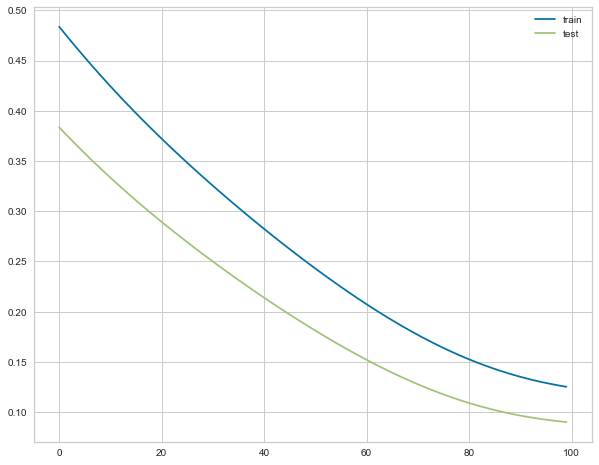

In [149]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=16, 
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train', )
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Evaluate Model

After the model is fit, we can forecast for the entire test dataset

In [150]:
from sklearn.metrics import mean_squared_error as mse


In [151]:
# make a prediction
yhat = model.predict(test_X)

# invert scaling for forecast
inv_yhat = np.concatenate([yhat, test_X[:,0]],axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:,0]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rnn_rmse = np.sqrt(mse(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rnn_rmse)

38/38 [==============================] - 1s 3ms/step
Test RMSE: 34.038


In [152]:
pd.DataFrame(inv_y)[:12]

,0
0,695.642212
1,716.234802
2,692.207458
3,685.218567
4,748.171021
5,724.612000
6,785.979492
7,771.164917
8,738.857239
9,772.172668


In [153]:
rmse_dict = pd.DataFrame([{'ARIMA rsme': sarima_rmse, 'Random Forest Regressor rsme': random_forest_regressor_rmse,
             'RNN rmse': rnn_rmse}])

In [154]:
rmse_dict

,ARIMA rsme,Random Forest Regressor rsme,RNN rmse
0,58.878051,32.707704,34.03838


We could see the randomforestregressor RMSE performed better than RNN and Arima. This might be because RNN needs more training data to outperform the other models.